In [2]:
import networkx as nx

from collections.abc import Iterable

# flatten Graph
def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el


# generate task
def generateTask(maxNumberOfTasks):
    import networkx as nx
    import random
    listOfNodes = list(range(1,maxNumberOfTasks+1))
    listOfEdges = []
    adjancyList = {}
    adjancyList[listOfNodes[-1]] = []
    for i in listOfNodes[:-1]:
        a = random.random()
        numbersInLayer = round(a/i * maxNumberOfTasks)
        maxNumber = i+numbersInLayer
        if maxNumber > maxNumberOfTasks:
            maxNumber = maxNumberOfTasks
        potentialChildNodes = list(range(i+2, maxNumber))

        childNodes = potentialChildNodes

        valInLists = list(flatten(list(adjancyList.values())))

        if (i+1) not in valInLists:
            listOfEdges.append([i, i+1])
            potentialChildNodes.append(i+1)
            
        adjancyList[i] = childNodes
        #adjancyList[i].append(i+1)
        #listOfEdges.append([i, i+1])
        for j in childNodes:
            listOfEdges.append([i,j])

    G = nx.DiGraph()
    G.add_edges_from(listOfEdges)

    for node in list(G.nodes()):
        if not nx.has_path(G,node,maxNumberOfTasks):
            adjancyList[node].append(maxNumberOfTasks)
            listOfEdges.append([node,maxNumberOfTasks])
    
    #print(adjancyList)
    
    G.add_edges_from(listOfEdges)
    return G

This graph is DAG? True


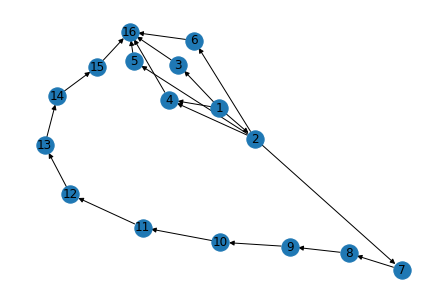

In [3]:
numbersOfTasks = 16
G = generateTask(numbersOfTasks)
print("This graph is DAG?",nx.is_directed_acyclic_graph(G)) # check if graph is DAG
nx.draw(G, with_labels = True) # draw

In [4]:
# список сопряженности
list(G.adjacency())

[(1, {2: {}, 3: {}, 4: {}}),
 (2, {4: {}, 5: {}, 6: {}, 7: {}}),
 (3, {16: {}}),
 (4, {16: {}}),
 (5, {16: {}}),
 (6, {16: {}}),
 (7, {8: {}}),
 (8, {9: {}}),
 (9, {10: {}}),
 (10, {11: {}}),
 (11, {12: {}}),
 (12, {13: {}}),
 (13, {14: {}}),
 (14, {15: {}}),
 (15, {16: {}}),
 (16, {})]

In [5]:
#numbers Of Nodes and edges
numbersOfNodes = len(G.nodes())
numbersOfEdges = len(G.edges())
print("numbersOfNodes:", numbersOfNodes,"numbersOfEdges:",numbersOfEdges)

numbersOfNodes: 16 numbersOfEdges: 20


In [6]:
# набор машин из AWS Amazon
CPU = [8,16,64, 96]
memory = [16,32,64,128, 256]
HDD = [475,600,2400,3600]
price = [0.3616, 0.824, 3.616, 5.712] # USD цены по каждому CPU. Почасовой тариф. Цена меняется только в зависомоти от CPU. по остальным параметрам взяты средние, потому что не значительно менются в цене. 

In [7]:
# рассчитываем стоимость каждой конфигурации и стоимость сети в зависимости от количесвта машин и соединений


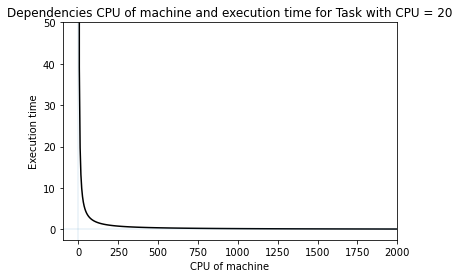

In [8]:
# ищем коэффициерт зависимости времени от cpu для каждой задачи (в данном упрощенном случае подчиняется закону гиперболы) = 
def plotDependenciesOfCPUForParticulatTask(cpuOfTask):
    import numpy as np
    import matplotlib.pyplot as plt


    x = np.linspace(0.1, cpuOfTask*100, 400)
    y = np.linspace(0.1, 50, 400)
    x, y = np.meshgrid(x, y)
    def axes():
        plt.axhline(0, alpha=.1)
        plt.axvline(0, alpha=.1)
        plt.xlabel("CPU of machine")
        plt.ylabel("Execution time")
        plt.title("Dependencies CPU of machine and execution time for Task with CPU = %s" %cpuOfTask)
    a = 2
    b = 1
    axes()
    plt.contour(x, y,(y - cpuOfTask*10/(x)), [0], colors='k')
    plt.show()
    
plotDependenciesOfCPUForParticulatTask(20)

In [9]:
def calculationOfExecutionTime(cpuOfTask, cpuOfMachine, MemoryOfTask, HDDOfMachine): # считаем время выполнения задачи на определнной машине
    executionTime = cpuOfTask*10/cpuOfMachine + MemoryOfTask/HDDOfMachine
    return executionTime

#print(calculationOfExecutionTime(76, 64, 13, 15), 'secоnds')
#print(calculationOfExecutionTime(76, 96, 13, 15), 'seconds')

In [10]:
class setOfMachines():
    setMachines = []

    def __init__(self, numbersOfMachines):
        self.numbersOfMachines = numbersOfMachines
        self.setFreeMachines = []
        self.setMachines = []


    def addMachines(self, machine):
        self.setMachines.append(machine)
    def setOfFreeMachines(self):
        self.setFreeMachines = []
        for i in self.setMachines:
            if i.availability == "free":
                self.setFreeMachines.append(i)
        return self.setFreeMachines
    def freeMachineWithBestCPUWithRequiredMemory(self, requiredMemory):
        bestCPU = 0
        for i in self.setMachines:
            if i.memory >= requiredMemory and i.CPU > bestCPU and i.availability == "free":
                machineWithBestCPU = i
                bestCPU = i.CPU
        if bestCPU == 0:
            return None
        else:
            return machineWithBestCPU
    def averageValuesOfFreeMachines(self):
        
        averageCPU = sum([i.CPU for i in self.setMachines]) / len(self.setMachines)
        averageMemory = sum([i.memory for i in self.setMachines]) / len(self.setMachines)
        averageHDD = sum([i.HDD for i in self.setMachines]) / len(self.setMachines)

        return averageCPU, averageMemory, averageHDD
    
    def priceOfAllAvailableMachines(self):
        commonPriceOfAllMachines = sum([i.price for i in self.setMachines])
        return commonPriceOfAllMachines

In [11]:
class machine():
    def CPU(self, CPU):
        self.CPU = CPU
    def memory(self, memory):
        self.memory = memory
    def HDD(self, HDD):
        self.HDD = HDD
    def availability(self, available):
        self.available = available
    def price(self, price):
        self.price = price

In [12]:
class machineCorrect():
    def __init__(self, CPU, memory, HDD, availability, price):
        self.CPU = CPU
        self.memory = memory
        self.HDD = HDD
        self.availability = availability
        self.price = price

In [13]:
def calculationOfExecutionTime(cpuOfTask, cpuOfMachine, MemoryOfTask, HDDOfMachine):
    executionTime = cpuOfTask*10/cpuOfMachine + MemoryOfTask/HDDOfMachine
    return executionTime

In [14]:
import random


numberOfMachines = 5
setOfAllMachines = setOfMachines(5)


# generate parameters of machines
for i in range(numberOfMachines):
    a = random.random()
    b = random.random()
    c = random.random()
    
    m1 = machine()
    m1.CPU = CPU[round(a * (len(CPU) - 1))]
    m1.memory = memory[round(b * (len(memory) - 1))]
    m1.HDD =  HDD[round(c * (len(HDD) - 1))]
    m1.availability = "free"
    m1.price = price[round(a * (len(price) - 1))]
    setOfAllMachines.addMachines(m1)

In [15]:
#create the list of parts of tasks


'''
def calculateThePartsOfTask(G):
    numbersOfTasks = G.nodes()
    partsOfTasks = [1] * len(numbersOfTasks)


    for i in G.nodes():

        childNodes = list(G.neighbors(i))
        numbersOfChildNodes = len(list(childNodes))

        if numbersOfChildNodes == 0:
            return partsOfTasks
        else:
            for j in childNodes:
                partsOfTasks[j-1] = partsOfTasks[i-1] / numbersOfChildNodes
                
                
    return partsOfTasks
'''



def calculateThePartsOfTask(G):
    dTree = {}
    dTree[1] = 1
    for node in G.nodes():
        childNodes = list(G.neighbors(node))
        if len(childNodes) != 0:
            for child in childNodes:
                if child in dTree:
                    dTree[child] += dTree[node] / len(childNodes)
                else:
                    dTree[child] = dTree[node] / len(childNodes)
    return dTree




In [16]:
calculateThePartsOfTask(G)[2]

0.3333333333333333

In [17]:
list(G.adjacency())

[(1, {2: {}, 3: {}, 4: {}}),
 (2, {4: {}, 5: {}, 6: {}, 7: {}}),
 (3, {16: {}}),
 (4, {16: {}}),
 (5, {16: {}}),
 (6, {16: {}}),
 (7, {8: {}}),
 (8, {9: {}}),
 (9, {10: {}}),
 (10, {11: {}}),
 (11, {12: {}}),
 (12, {13: {}}),
 (13, {14: {}}),
 (14, {15: {}}),
 (15, {16: {}}),
 (16, {})]

считаем время как выполнение определнной задачи на всех представленных машинах одновресенно (параллельно). пока берем их производиетльнсть как среднее по параметрам.
Считаем для всех нод общее время выполнения для всех его дочерних нод. так как у нас ордна нодла стоит вверху и мы считаем ее время отдельно это гарантирует то, что мы проходим по всем нодам графа

In [18]:
partsOfTask = calculateThePartsOfTask(G) # определяем части задания для каждой ноды



def calculateExecutedTimeInEachNode(parentNode, CPUOfTask, memoryOfTask, G, visited = []):
    partsOfTask = calculateThePartsOfTask(G)
    childNodes = G.neighbors(parentNode)
    #print(list(G.adjacency()))
    #print(list(G.neighbors(parentNode)))
    
    numbersOfChildNodes = len(list(G.neighbors(parentNode)))
    
    
    #print(list(childNodes), numbersOfChildNodes, len(list(childNodes)))
    
    #CPUOfTask = CPUOfTask + 10
    #memoryOfTask = memoryOfTask + 10 
    calculationOfExecutionTimes = 0
    #print(parentNode, numbersOfChildNodes)
    #if numbersOfChildNodes != 0:
                
    #    onePartOfTask = partsOfTask[list(childNodes)[0] - 1]
    
    if numbersOfChildNodes == 1 and list(G.neighbors(parentNode))[0] not in visited:
        
        onePartOfTask = partsOfTask[list(G.neighbors(parentNode))[0]]

        # считаем время выполнения задачи на какой-то машине с учетом CPU и HDD

        # здесь считаем как будто задача выполлняется на одной машине
        #calculationOfExecutionTimeCPU = calculationOfExecutionTime(CPUOfTask, setOfAllMachines.freeMachineWithBestCPUWithRequiredMemory(memoryOfTask).CPU, memoryOfTask, setOfAllMachines.freeMachineWithBestCPUWithRequiredMemory(memoryOfTask).HDD)


        # здесь считаем, что выполняется параллельно на всех свободных машинах. Считаем время для средних значений на всех машинах и делим на общее кол-во свободных машин
    
        numberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())

        calculationOfExecutionTimeParalell =  calculationOfExecutionTime(CPUOfTask * onePartOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask * onePartOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/numberOfFreeMachines
        #print(onePartOfTask,calculationOfExecutionTimeParalell)
        calculationOfExecutionTimes += calculationOfExecutionTimeParalell
        
        CPUOfTask = CPUOfTask + 10
        memoryOfTask = memoryOfTask + 10 

        # предположим, что параметры задания увеличиваются с каждой дальнейшей операцией


    elif numbersOfChildNodes > 1:
        
        calculationOfExecutionTimes = 0
        for i in G.neighbors(parentNode):
            if i not in visited:
                onePartOfTask = partsOfTask[i]
                numberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())
                calculationOfExecutionTimes +=  calculationOfExecutionTime(CPUOfTask * onePartOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask * onePartOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/len(setOfAllMachines.setOfFreeMachines())


        CPUOfTask = (CPUOfTask + 10)
        memoryOfTask = (memoryOfTask + 10)
        
    elif numbersOfChildNodes == 0:
        calculationOfExecutionTimes = 0
        CPUOfTask = 0
        memoryOfTask = 0
    
    visited.extend(list(childNodes))
        
    return calculationOfExecutionTimes, CPUOfTask, memoryOfTask, visited

In [19]:
childNodes = G.neighbors(3)


In [20]:
childNodes

In [21]:
'''

print("numbers of machines", len(setOfAllMachines.setMachines))
currentTime = 0
CPUOfTask = 56
memoryOfTask = 34


commonPrice = 0
numberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())
calculationOfExecutionTimeParalell =  calculationOfExecutionTime(CPUOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/numberOfFreeMachines
currentTime = calculationOfExecutionTimeParalell
#commonPrice = sum(price) * currentTime

for parentNode in G.nodes():
    
    calculationOfExecutionTimeInChildNodes, outCPUOfTask, outMemoryOfTask = calculateExecutedTimeInEachNode(parentNode, CPUOfTask, memoryOfTask)
    currentTime += calculationOfExecutionTimeInChildNodes
    #commonPrice += sum(price) * currentTime
    
    #print(parentNode, calculationOfExecutionTimeInChildNodes)
        
print("Time of all calculation is ",currentTime)
print("Common price for one workflow in USD (depends on time)", currentTime * setOfAllMachines.priceOfAllAvailableMachines())

'''

'\n\nprint("numbers of machines", len(setOfAllMachines.setMachines))\ncurrentTime = 0\nCPUOfTask = 56\nmemoryOfTask = 34\n\n\ncommonPrice = 0\nnumberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())\ncalculationOfExecutionTimeParalell =  calculationOfExecutionTime(CPUOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/numberOfFreeMachines\ncurrentTime = calculationOfExecutionTimeParalell\n#commonPrice = sum(price) * currentTime\n\nfor parentNode in G.nodes():\n    \n    calculationOfExecutionTimeInChildNodes, outCPUOfTask, outMemoryOfTask = calculateExecutedTimeInEachNode(parentNode, CPUOfTask, memoryOfTask)\n    currentTime += calculationOfExecutionTimeInChildNodes\n    #commonPrice += sum(price) * currentTime\n    \n    #print(parentNode, calculationOfExecutionTimeInChildNodes)\n        \nprint("Time of all calculation is ",currentTime)\nprint("Common price for one workflow in USD (depends on time)", cur

In [22]:
# generatimgf the machines
# put the price of each (price depends from hours)
# набор машин из AWS Amazon
# all available machines

CPU = [8,16,64, 96]
memory = [16,32,64,128, 256]
HDD = [475,600,2400,3600]

price = [0.3616, 0.824, 3.616, 5.712] # USD цены по каждому CPU. Почасовой тариф. Цена меняется только в зависомоти от CPU. по остальным параметрам взяты средние, потому что не значительно менются в цене. 

In [23]:
# нужно как-то добавить время передачи данных по проводам. Скорее всего это зависит от количесвта машин на которые мы распределяемю.
# пусть оно зависит от параметра memory.

In [24]:
# расчет для времени и стоимости для 5 машин со случайными параметрами
import random
CPUOfTask = 10
memoryOfTask = 15

numberOfMachines = 5
setOfAllMachines = setOfMachines(5)


# generate parameters of machines
for i in range(numberOfMachines):
    a = random.random()
    b = random.random()
    c = random.random()
    
    m1 = machine()
    m1.CPU = CPU[round(a * (len(CPU) - 1))]
    m1.memory = memory[round(b * (len(memory) - 1))]
    m1.HDD =  HDD[round(c * (len(HDD) - 1))]
    m1.availability = "free"
    m1.price = price[round(a * (len(price) - 1))]
    setOfAllMachines.addMachines(m1)
    
print("numbers of machines", len(setOfAllMachines.setMachines))


# put the parameters of tasks
currentTime = 0


outCPUOfTask = CPUOfTask
outMemoryOfTask = memoryOfTask

commonPrice = 0 # стоимость работы. зависит от времени и машин

numberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())
calculationOfExecutionTimeParalell =  calculationOfExecutionTime(CPUOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/numberOfFreeMachines
currentTime = calculationOfExecutionTimeParalell # ставим время выполнения певрого задания за первоначальное
#commonPrice = sum(price) * currentTime

visited = []
for parentNode in G.nodes():
    
    calculationOfExecutionTimeInChildNodes, outCPUOfTask, outMemoryOfTask, visited = calculateExecutedTimeInEachNode(parentNode, outCPUOfTask, outMemoryOfTask, G, visited)
    currentTime += calculationOfExecutionTimeInChildNodes
    #commonPrice += sum(price) * currentTime
    
    #print(parentNode, calculationOfExecutionTimeInChildNodes)
        
print("Time of all calculation is ",currentTime)
print("Common price for one workflow in USD (depends on time)", currentTime * setOfAllMachines.priceOfAllAvailableMachines())


# пусть количевсто компьютеров и memory имеют прямую зависимость со временем выполнения

timeForTransferData = numberOfMachines * memoryOfTask / 100

commonTime = currentTime * timeForTransferData

print("Common time for calculation and tarsfer",commonTime)

numbers of machines 5
Time of all calculation is  4.023818542568543
Common price for one workflow in USD (depends on time) 59.65552418470419
Common time for calculation and tarsfer 3.0178639069264075


In [25]:
#calculateExecutedTimeInEachNode(13, 10, 15,G, vis)

In [26]:
# алгоритм подсчета времени не очень хороший, но в целом выполняет свои функции

In [27]:
#теперь нужно подобрать оптимальный набор машин для выполнения задачи с ограниченным бюджетом и минимальным временем

In [78]:
def calculateTimeAndPrice(CPUOfTask, memeoryOfTask, numberOfMachines, setOfAllMachines, G):
    # put the parameters of tasks
    currentTime = 0
    outCPUOfTask = CPUOfTask
    outMemoryOfTask = memoryOfTask

    commonPrice = 0 # стоимость работы. зависит от времени и машин

    numberOfFreeMachines = len(setOfAllMachines.setOfFreeMachines())
    calculationOfExecutionTimeParalell =  calculationOfExecutionTime(CPUOfTask, setOfAllMachines.averageValuesOfFreeMachines()[0], memoryOfTask, setOfAllMachines.averageValuesOfFreeMachines()[2])/numberOfFreeMachines
    currentTime = calculationOfExecutionTimeParalell # ставим время выполнения певрого задания за первоначальное
    #commonPrice = sum(price) * currentTime

    visited = []
    for parentNode in G.nodes():
        calculationOfExecutionTimeInChildNodes, outCPUOfTask, outMemoryOfTask, visited = calculateExecutedTimeInEachNode(parentNode, outCPUOfTask, outMemoryOfTask, G, visited)
        currentTime += calculationOfExecutionTimeInChildNodes
        #print(calculationOfExecutionTimeInChildNodes)
        #commonPrice += sum(price) * currentTime

        #print(parentNode, calculationOfExecutionTimeInChildNodes)

        
    #print("Time of all calculation is ",currentTime)
    #print("Common price for one workflow in USD (depends on time)", currentTime * setOfAllMachines.priceOfAllAvailableMachines())




    # пусть количевсто компьютеров и memory имеют прямую зависимость со временем выполнения

    timeForTransferData = numberOfMachines * memoryOfTask / 50

    commonTime = currentTime + timeForTransferData

    #print("Common time for calculation and transfer",commonTime )
    return commonTime, currentTime * setOfAllMachines.priceOfAllAvailableMachines()

In [79]:
calculateTimeAndPrice(100, 20, 3, setOfAllMachines, G)

(7.858950617283951, 66.0001827160494)

In [30]:
calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)

(5.523818542568543, 59.65552418470419)

In [31]:

# плохой алгоритм
#  рассматорим случай одной машины
# начнем с того, что найдем оптимиальноен решение для одной машины
# brute force

import math

limitBudget = 1800 # предел бюджета
bestTime = math.inf 

for i in range(len(CPU)):
    for j in range(len(memory)):
        for z in range(len(HDD)):
            numberOfMachines = 6
            setOfAllMachines = setOfMachines(numberOfMachines)
            for k in range(numberOfMachines):
                m1 = machine()
                m1.CPU = CPU[i]
                m1.memory = memory[j]
                m1.HDD =  HDD[z]
                m1.availability = "free"
                m1.price = price[i] + memory[j] /3000  + HDD[z] / 30000
                setOfAllMachines.addMachines(m1)
            
            
            time, budget = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
            
            if budget < limitBudget and bestTime > time:
                bestTime = time
                bestBudget = budget
                CPUBest = i
                memoryBest = j
                HDDBest = z                
                
                
print("CPUBest",CPUBest,"memoryBest", memoryBest,"HDDBest", HDDBest,"bestTime", bestTime,"bestBudget in USD", bestBudget)

CPUBest 3 memoryBest 0 HDDBest 3 bestTime 3.64320987654321 bestBudget in USD 64.55658271604939


In [80]:
time, budget = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)

In [81]:
listOfBoost = list(map(lambda n: n / CPU[0], CPU))
print("list of boost CPU", listOfBoost)

listOfIncreasingPrice = list(map(lambda n: n / price[0], price))
print("list of increasing price", listOfIncreasingPrice)

priceForOnePointOfBoost = list(map(lambda n1,n2: n2/n1, listOfBoost, listOfIncreasingPrice))
print("price for one boosting", priceForOnePointOfBoost)

# можно сделать вывод, что после выполненного задания с минимальнми параметрами можно установить цену для для лругих CPU

#  но так делать не надо, лучше сразу написать нормальный алгоритм
# во сколько раз CPU с меньшим значением считает медленнее, чем cpu c большим значением? cpuOfTask*10/cpuOfMachine + MemoryOfTask/HDDOfMachine


list of boost CPU [1.0, 2.0, 8.0, 12.0]
list of increasing price [1.0, 2.2787610619469025, 10.000000000000002, 15.79646017699115]
price for one boosting [1.0, 1.1393805309734513, 1.2500000000000002, 1.3163716814159292]


In [34]:
#Стоимость использования машин зависит от времени использования

Для реализации алгоритма поиска наиболе подходящей конфигурации будлем использовать следующий алгоритм:
Это алгоритм для определения конфигнураций машин по заданному кол-ву машин
Так как в этом случае все машины вычисляют параллельно каждую задачу они имеют одинаковые конфигурации
То есть нам нужно найти конфигурацию машин (общую длля всех) которая бы выполняла текущий рабочий процесс за минимальное время с ограниченным бюджетом


In [35]:
limitBudget = 40
numberOfMachines = 5

Считаем для каждого CPU бюджет и время работы для конфигураций с худшимии параметарми HDD и memory и с лучшими.
Это тисходит из логики, что цена в оснвоном зависит от CPU и таким образом мы подсчитаем интервал значений цены и времени для каждого значения CPU
Затем мы сравниваем значение наименьшей цены для каждого CPU с данным ограничением бюджета
И получаем урезщанный список подходящих CPU


In [36]:
def selectSeveralSuitableConfigaration(limitBudget, numberOfMachines, CPUOfTask, memoryOfTask, G):
    import math

    bestTime = math.inf 
    suitableCPUForThisBudget = {}

    
    timeForTransferData = numberOfMachines * memoryOfTask / 50

    for i in range(len(CPU)):
        setOfAllMachines = setOfMachines(numberOfMachines)        
        for resource in range(numberOfMachines):
            # считаем время и стоимость для минимальной конфигурации текущего CPU
            m1 = machine()
            m1.CPU = CPU[i]
            m1.memory = memory[0]
            m1.HDD =  HDD[0]
            m1.availability = "free"
            m1.price = price[i] + memory[0] /3000  +  HDD[0] / 30000
            setOfAllMachines.addMachines(m1)

        timeForMinConf, budgetForMinConf = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
        #print(timeForMinConf, budgetForMinConf)

        
        
        setOfAllMachines = setOfMachines(numberOfMachines)        

        # считаем время и стоимость для максимальной конфигурации текущего CPU
        for resource in range(numberOfMachines):
            m1 = machine()
            m1.CPU = CPU[i]
            m1.memory = memory[len(memory)-1]
            m1.HDD =  HDD[len(HDD)-1]
            m1.availability = "free"
            m1.price = price[i] + memory[len(memory)-1] /3000  +  HDD[len(HDD)-1] / 30000
            setOfAllMachines.addMachines(m1)

        timeForMaxConf, budgetForMaxConf = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
        
        

        if limitBudget >= (budgetForMinConf):
            suitableCPUForThisBudget[i] = [timeForMinConf, timeForMaxConf]
    print(suitableCPUForThisBudget)
    
    return suitableCPUForThisBudget

In [58]:
suitableCPUForThisBudget = selectSeveralSuitableConfigaration(limitBudget, numberOfMachines, CPUOfTask, memoryOfTask, G) # budgetLimit, numberOfMachines

suitableCPUForThisBudget = selectSeveralSuitableConfigaration(100, 5, 100, 100, G) # budgetLimit, numberOfMachines


{0: [9.134693794671865, 9.120987654320988], 1: [6.009693794671864, 5.995987654320987], 2: [3.665943794671865, 3.6522376543209876], 3: [3.405527128005198, 3.391820987654321]}
{0: [42.86272011046134, 42.85723765432099], 1: [30.36272011046134, 30.35723765432099]}


Находим минимальное время выполненения задачи среди всех максимумов для наихудших конфигураций заданного CPU
Затем сравниваем этот минимум со временем при максимальных конфигурациях CPU и в этом случае, будет возможно, что здесь будет время меньше найденного минимума
Все полученые результаты добавляем в новый словарь

In [59]:
def findMinimumTimeFromSuitableMachines(suitableCPUForThisBudget):

    configarationWithMinimumTime = {}

    # находим минимальное время обработки между наименьшими конфигурациями возможными
    configarationWithMinimumTime[min(suitableCPUForThisBudget.items(), key=lambda x: x[1][0])[0]] = [min(suitableCPUForThisBudget.items(), key=lambda x: x[1][0])[1]]
    MINiMIN = min(suitableCPUForThisBudget.items(), key=lambda x: x[1][0]) [1][0]
    # сравним это минимальное время со временем в остальных конфигурациях с наибольшим значением

    for key, val in suitableCPUForThisBudget.items():
        if val[1] <= MINiMIN:
            configarationWithMinimumTime[key] = val


    print(configarationWithMinimumTime)
    
    return configarationWithMinimumTime

In [60]:
configarationWithMinimumTime = findMinimumTimeFromSuitableMachines(suitableCPUForThisBudget)

{1: [30.36272011046134, 30.35723765432099]}


Найдем наилучшую машину среди всех отфильтрованных на предыдущих шагах результатах

In [87]:
def findBestMachines(configarationWithMinimumTime, limitBudget, numberOfMachines,memoryOfTask, G, CPUOfTask):
    
    timeForTransferData = numberOfMachines * memoryOfTask / 50
    memoryBest = math.inf
    bestTime = math.inf 
    for key, val in configarationWithMinimumTime.items():
        for j in range(len(memory)):
            for z in range(len(HDD)):
                setOfAllMachines = setOfMachines(numberOfMachines)        
                for resource in range(numberOfMachines):
                    m1 = machine()
                    m1.CPU = CPU[key]
                    m1.memory = memory[j]
                    m1.HDD =  HDD[z]
                    m1.availability = "free"
                    m1.price = price[key] + memory[j] /3000  +  HDD[z] / 30000
                    setOfAllMachines.addMachines(m1)

                timeForConf, budgetForConf = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
                #print(timeForMinConf, budgetForMinConf)


                # считаем время и стоимость для максимальной конфигурации текущего CPU

                if (timeForConf + timeForTransferData) <= bestTime and limitBudget >= budgetForConf:
                    bestTime = timeForConf
                    budget = budgetForConf
                    CPUBest = key
                    memoryBest = j
                    HDDBest = z

    print("CPUBest",CPU[key],"memoryBest", memory[memoryBest],"HDDBest", HDD[HDDBest],"bestTime", bestTime,"bestBudget in USD", budget)
    return CPUBest, memoryBest, HDDBest, bestTime, budget

In [63]:
findBestMachines(configarationWithMinimumTime, limitBudget, numberOfMachines,memoryOfTask, G, CPUOfTask)
findBestMachines(configarationWithMinimumTime, 100, 5,100, G, 100)

CPUBest 16 memoryBest 256 HDDBest 3600 bestTime 5.995987654320987 bestBudget in USD 9.873339917695473
CPUBest 16 memoryBest 256 HDDBest 3600 bestTime 30.35723765432099 bestBudget in USD 97.05191646090536


(1, 4, 3, 30.35723765432099, 97.05191646090536)

In [64]:
# общий алгоритм
def bestConfuguration(limitBudget, numberOfMachines,CPUOfTask, memoryOfTask, G):
    suitableCPUForThisBudget = selectSeveralSuitableConfigaration(limitBudget, numberOfMachines,  CPUOfTask, memoryOfTask, G) # budgetLimit, numberOfMachines
    configarationWithMinimumTime = findMinimumTimeFromSuitableMachines(suitableCPUForThisBudget)
    bestMachine = findBestMachines(configarationWithMinimumTime, limitBudget, numberOfMachines,memoryOfTask, G, CPUOfTask)
    return bestMachine

In [65]:
# calculate best configuration with specified numbers of machines and limit of budget
bestConfuguration(100, 5, 100, 100, G)

{0: [42.86272011046134, 42.85723765432099], 1: [30.36272011046134, 30.35723765432099]}
{1: [30.36272011046134, 30.35723765432099]}
CPUBest 16 memoryBest 256 HDDBest 3600 bestTime 30.35723765432099 bestBudget in USD 97.05191646090536


(1, 4, 3, 30.35723765432099, 97.05191646090536)

теперь нужно подсчитать оптимальное количество машин
кол-во машин в основном влияет на время затраченное на перенос данных между компьютерамит 
и оно напрямую зависит от кол-ва компьютеров

numberOfMachines * memoryOfTask / 50

если время затраченное на перенос превосходит общее время на предыдущем кол-ве компьютеров, то нужно остановиться на уже полученном оптимальной количестве времени
определить максимальное рентабелдьное число компьютеров (когда время на передачу данных между компьютерами не должно превосходить оптимальное время на предыдущих шагах (на предыдущем количсвте компьютеровы)

In [44]:
budgetLimit = 40

In [96]:
# задаем параметры CPUOfTask, memoryOfTask, budgetLimit, numberOfTask in Graph


def findNumberOfMachine(CPUOfTask, memoryOfTask, budgetLimit, numberOfTask):
    
    G = generateTask(numberOfTask)

    import math
    numberOfMachines = 1
    bestTimeForNumberOfMachines = math.inf
    currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines, CPUOfTask, memoryOfTask, G)
    currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
    while currentBestConfForNumberOfMachines[4] < budgetLimit and (numberOfMachines * memoryOfTask / 50) < bestTimeForNumberOfMachines and currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
        #currentBestTimeForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines)[3]

        if  currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
            bestTimeForNumberOfMachines = currentBestTimeForNumberOfMachines
            bestConfiguration = currentBestConfForNumberOfMachines
            
        currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines+1, CPUOfTask, memoryOfTask, G)
        currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
        numberOfMachines += 1
    print("optimal number of machines", numberOfMachines,'', "best Time For Number Of Machines", bestTimeForNumberOfMachines)
    return numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration


def findNumberOfMachine(CPUOfTask, memoryOfTask, budgetLimit, G):
    
    import math
    numberOfMachines = 1
    bestTimeForNumberOfMachines = math.inf
    currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines, CPUOfTask, memoryOfTask, G)
    currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
    
    
    while currentBestConfForNumberOfMachines[4] < budgetLimit  and (numberOfMachines * memoryOfTask / 50) < bestTimeForNumberOfMachines and currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
        #currentBestTimeForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines)[3]

        if  currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
            bestTimeForNumberOfMachines = currentBestTimeForNumberOfMachines
            bestConfiguration = currentBestConfForNumberOfMachines
            
        currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines+1, CPUOfTask, memoryOfTask, G)
        currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
        numberOfMachines += 1
    print("optimal number of machines", numberOfMachines,'', "best Time For Number Of Machines", bestTimeForNumberOfMachines)
    return numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration


def findNumberOfMachine(CPUOfTask, memoryOfTask, budgetLimit, G):
    
    import math
    numberOfMachines = 1
    bestTimeForNumberOfMachines = math.inf
    currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines, CPUOfTask, memoryOfTask, G)
    currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
    
    
    while True and currentBestConfForNumberOfMachines[4] < budgetLimit  and (numberOfMachines * memoryOfTask / 50) < bestTimeForNumberOfMachines:
        #currentBestTimeForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines)[3]

        if  currentBestTimeForNumberOfMachines < bestTimeForNumberOfMachines:
            bestTimeForNumberOfMachines = currentBestTimeForNumberOfMachines
            bestConfiguration = currentBestConfForNumberOfMachines
            bestNumberOfMachine = numberOfMachines
            
        currentBestConfForNumberOfMachines = bestConfuguration(budgetLimit, numberOfMachines+1, CPUOfTask, memoryOfTask, G)
        currentBestTimeForNumberOfMachines = currentBestConfForNumberOfMachines[3]
        numberOfMachines += 1
    print("optimal number of machines", bestNumberOfMachine,'', "best Time For Number Of Machines", bestTimeForNumberOfMachines)
    return bestNumberOfMachine, bestTimeForNumberOfMachines, bestConfiguration

In [97]:
# задаем параметры CPUOfTask, memoryOfTask, budgetLimit, numberOfTask in workflow


numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration = findNumberOfMachine(100, 100, 100, G)

print(numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration)
#print(f"Best results algorithm shows in {numberOfMachines} machines with following configuration CPU = {bestConfiguration[0]}, memoryBest = {bestConfiguration[1]}. Common time = {bestTimeForNumberOfMachines}")

{0: [135.5787361923327, 135.395987654321], 1: [73.07873619233268, 72.89598765432099], 2: [26.203736192332688, 26.020987654320994], 3: [20.995402858999352, 20.812654320987658]}
{3: [20.995402858999352, 20.812654320987658]}
CPUBest 96 memoryBest 16 HDDBest 475 bestTime 18.995402858999352 bestBudget in USD 97.43747715778645
{0: [76.97347303443794, 76.88209876543209], 1: [45.72347303443794, 45.63209876543209]}
{1: [45.72347303443794, 45.63209876543209]}
CPUBest 16 memoryBest 16 HDDBest 475 bestTime 41.72347303443794 bestBudget in USD 63.76524391921159
{0: [60.10505198180636, 60.04413580246913], 1: [39.27171864847304, 39.2108024691358]}
{1: [39.27171864847304, 39.2108024691358]}
CPUBest 16 memoryBest 16 HDDBest 475 bestTime 33.27171864847304 bestBudget in USD 69.14744263320338
{0: [53.670841455490574, 53.62515432098765], 1: [38.045841455490574, 38.00015432098766]}
{1: [38.045841455490574, 38.00015432098766]}
CPUBest 16 memoryBest 16 HDDBest 475 bestTime 30.045841455490578 bestBudget in USD 